# 02. XỬ LÝ DỮ LIỆU & TẠO DATASET CHO LSTM
Tuần 2 – Ngày 1 (09/12/2025)  
Dự đoán giá Bitcoin bằng LSTM  
Người thực hiện: doanhuy23

In [1]:
#%pip install scikit-learn numpy pandas matplotlib -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

In [23]:
# Load dữ liệu đã thu thập
df = pd.read_csv(
    "D:/Code/python/DoAn_LSTM_PredictPrice/data/data/BTC_USD_2017_2025_daily.csv",
    skiprows=2,
    names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'],
    parse_dates=['Date'],
    index_col='Date'
)

# Sắp xếp theo ngày tăng dần
df = df.sort_index()

print(f"\nTổng cộng: {len(df)} ngày")
df.tail()



Tổng cộng: 3264 ngày


C:\Users\pv\AppData\Local\Temp\ipykernel_13144\1502898791.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,Open,High,Low,Close,Volume
Date,,,,,
2025-12-04,92141.625000,94038.242188,90976.101562,93454.257812,6.453840e+10
2025-12-05,89387.757812,92702.640625,88152.140625,92133.648438,6.325640e+10
2025-12-06,89272.375000,90267.460938,88951.664062,89389.359375,3.799404e+10
2025-12-07,88842.875000,89767.546875,87861.257812,89235.890625,3.711782e+10
Date,NaN,NaN,NaN,NaN,NaN


In [ ]:
# In ra tên cột để kiểm tra (bạn sẽ thấy đúng là 'Close')
print("Tên các cột hiện tại:", df.columns.tolist())

# CHỌN CỘT CLOSE – DÙNG .loc
data = df.loc[:, ['Close']].values.astype(float)

print("Đã lấy cột Close thành công!")
print("Shape:", data.shape)
print("5 giá trị đầu:", data[:5].flatten())

Tên các cột hiện tại: ['Open', 'High', 'Low', 'Close', 'Volume']
Đã lấy cột Close thành công!
Shape: (3264, 1)
5 giá trị đầu: [ 963.65802002  998.61700439 1021.59997559 1044.40002441 1156.72998047]


In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Hàm tạo sliding window
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i-window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_dataset(scaled_data, window_size)

print(f"X shape: {X.shape}")   # (số mẫu, 60)
print(f"y shape: {y.shape}")   # (số mẫu,)

X shape: (3204, 60)
y shape: (3204,)


In [16]:
# Reshape thành [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Chia train / val / test = 70% / 15% / 15%
train_size = int(len(X) * 0.70)
val_size = int(len(X) * 0.15)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (2242, 60, 1), Val: (480, 60, 1), Test: (482, 60, 1)


In [17]:
os.makedirs("data/processed", exist_ok=True)

np.save("data/processed/X_train.npy", X_train)
np.save("data/processed/X_val.npy", X_val)
np.save("data/processed/X_test.npy", X_test)
np.save("data/processed/y_train.npy", y_train)
np.save("data/processed/y_val.npy", y_val)
np.save("data/processed/y_test.npy", y_test)
np.save("data/processed/scaler.npy", scaler)  # để inverse sau này

print("ĐÃ LƯU XONG TOÀN BỘ DATASET ĐÃ XỬ LÝ!")

ĐÃ LƯU XONG TOÀN BỘ DATASET ĐÃ XỬ LÝ!


## Kiểm tra dữ liệu đầu vào của 1 mẫu

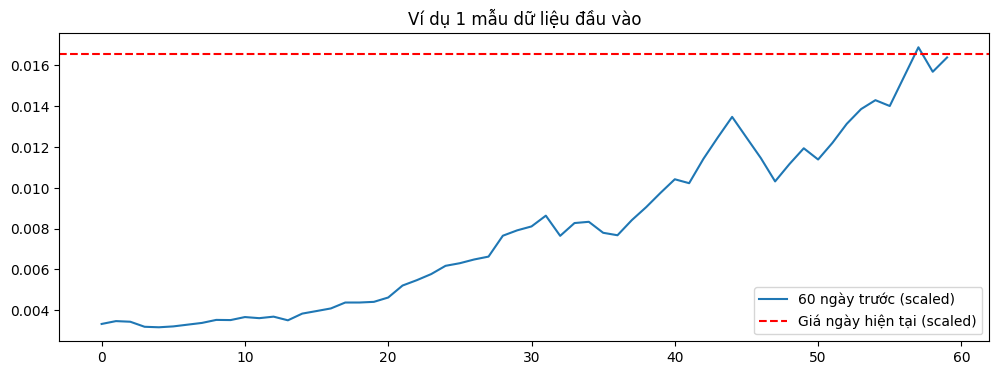

In [18]:
sample_idx = 100
plt.figure(figsize=(12,4))
plt.plot(range(window_size), X_train[sample_idx].flatten(), label='60 ngày trước (scaled)')
plt.axhline(y_train[sample_idx], color='red', linestyle='--', label='Giá ngày hiện tại (scaled)')
plt.legend()
plt.title('Ví dụ 1 mẫu dữ liệu đầu vào')
plt.show()